![CDS 411 logo](../../img/cds-411-logo.png)

# Class 7: System dynamics models: Growth and decay

---

![CC BY-SA 4.0 license](../../img/cc-by-sa.png)

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 4.0 International License](http://creativecommons.org/licenses/by-sa/4.0/).

## Load packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## Growth model for bacterial colony

Iteratively solve the difference equation using numerical methods

\begin{equation}
P(t)=P(t-\Delta{}t)-rP(t-\Delta{}t)\Delta{}t
\end{equation}

Assume the following constants:

```python
population = 100
r = 0.1
delta_t = 0.001
time_of_simulation = 50.5
```

### Class-led solution

How do I handle this in Python?

Define our constants:

In [2]:
population = 100
r = 0.1
delta_t = 0.001
time_of_simulation = 50.5

Define a list to store our simulation history.

In [3]:
trace = [[0, population]]

Iteratively solve the difference equation using a `for` loop and store the `[time_step, population]` pair in `trace`:

In [4]:
for time_step in range(1, int(time_of_simulation / delta_t) + 1):
    population = population + r * population * delta_t
    trace.append([time_step, population])

Convert our results into a DataFrame.

**How can we extract out the first column and the second column of `trace`?**

Remember, these are not `numpy` arrays!

We use list comprehensions, for example:

```
[time_step[0] for time_step in trace]
```

This is equivalent to the following:

```python
column_one = []
for time_step in trace:
    column_one.append(time_step[0])
```

With list comprehensions, we can feed each column into `pd.DataFrame` as follows:

In [5]:
bacteria_df = pd.DataFrame({
    "time_step": [time_step[0] for time_step in trace],
    "population": [time_step[1] for time_step in trace]
})

In [6]:
bacteria_df.head()

,time_step,population
0,0,100.000000
1,1,100.010000
2,2,100.020001
3,3,100.030003
4,4,100.040006


`time_step` is just the iteration index for each step of the simulation. To convert back to "real" time, multiply `time_step` by `delta_t`. With our Pandas data frame, this is simple to do:

In [7]:
bacteria_df["time"] = bacteria_df["time_step"] * delta_t

Finally, we should visualize the results of our simulation. Here's how to do it in `matplotlib`:

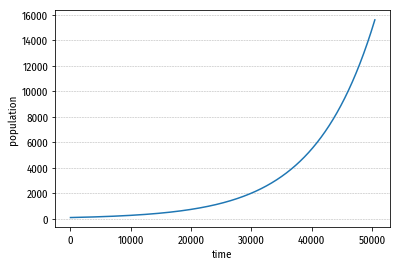

In [8]:
fig, ax = plt.subplots()  # Define an "axis" object for more control over plot

ax.plot(bacteria_df["time_step"], bacteria_df["population"]);

# Don't forget to label your plot!
ax.set_xlabel("time")
ax.set_ylabel("population");